In [30]:
from scipy.ndimage import correlate
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
from skimage.filters import median, gaussian, prewitt, prewitt_h, prewitt_v, threshold_otsu

# Exercise 1

In [31]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [32]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]


In [33]:
res_img = correlate(input_img, weights)
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


In [34]:
# Since arrays are zero-indexed, position (3,3) is the element at index 2.
print(res_img[2,2])

72


# Exercise 2

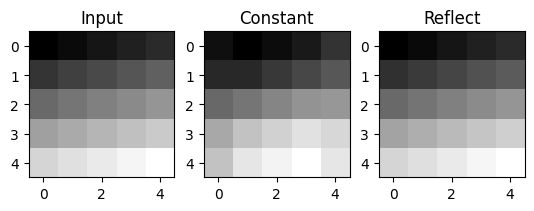

In [35]:
res_img_constant = correlate(input_img, weights, mode="constant", cval=10)
res_img_reflect = correlate(input_img, weights, mode="reflect")

# Compare the outputs
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(input_img, cmap="gray")
plt.title("Input")
plt.subplot(1, 3, 2)
plt.imshow(res_img_constant, cmap="gray")
plt.title("Constant")
plt.subplot(1, 3, 3)
plt.imshow(res_img_reflect, cmap="gray")
plt.title("Reflect")
plt.show()

The differences can be seen in the borders, where some pixels in the constant are darker

# Exercise 3

(450, 450)


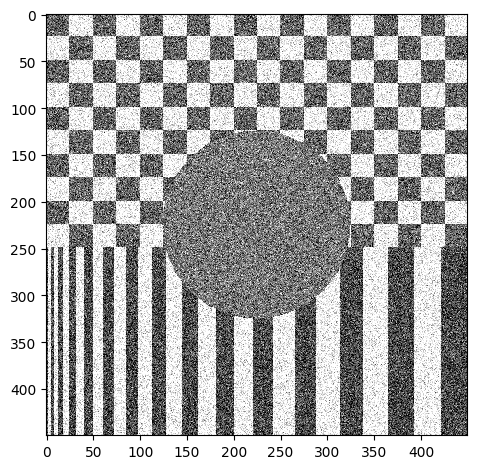

In [36]:
gaus_img = io.imread("data/Gaussian.png")
gaus_img = color.rgb2gray(gaus_img)
print(gaus_img.shape)
io.imshow(gaus_img)

In [37]:
# Mean filter with normalized weights

size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

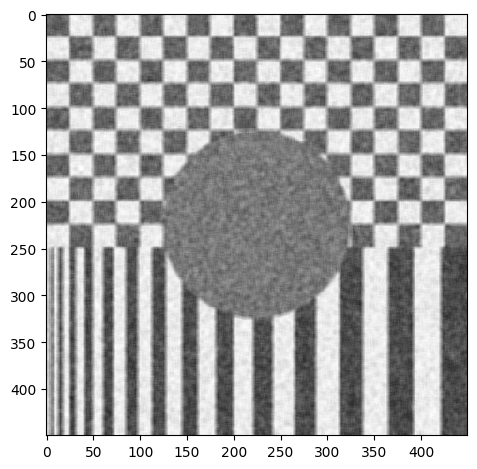

In [38]:
res_img = correlate(gaus_img, weights)
io.imshow(res_img)

In [39]:
def mean_filter(img, kernel):
    # Two dimensional filter filled with 1
    weights = np.ones([kernel, kernel])
    # Normalize weights
    weights = weights / np.sum(weights)
    res_img = correlate(img, weights)
    
    plt.figure()
    plt.imshow(res_img, cmap='gray')
    plt.title(f'Mean Filter (kernel={kernel}x{kernel})')
    plt.axis('off')
    plt.show()

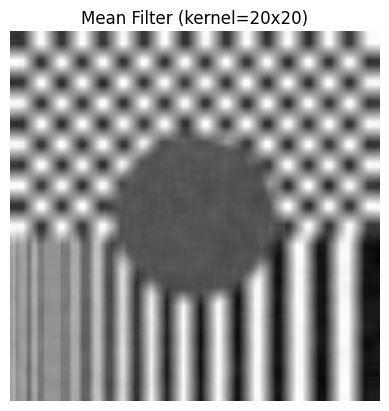

In [40]:
mean_filter(gaus_img, 20)  

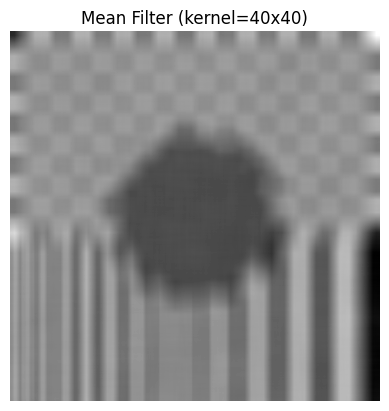

In [41]:
mean_filter(gaus_img, 40)

Increasing the filter size means a more blurred image.
The noise is reduced but the sharpness of the edges is lost

# Exercise 4

In [42]:
size = 5
footprint = np.ones([size, size])
med_img = median(gaus_img, footprint)

In [43]:
def median_filter(img,size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)

    plt.figure()
    plt.imshow(med_img, cmap='gray')
    plt.title(f'Median Filter (kernel={size}x{size})')
    plt.axis('off')
    plt.show()

Size: 5


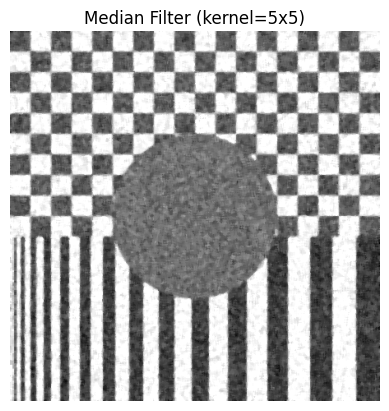

Size: 10


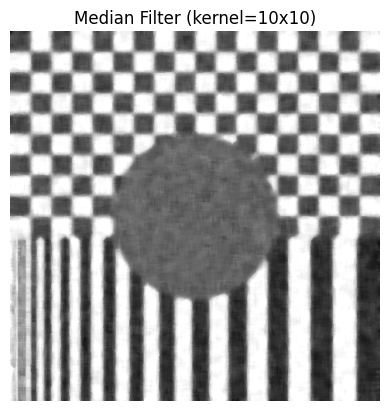

Size: 20


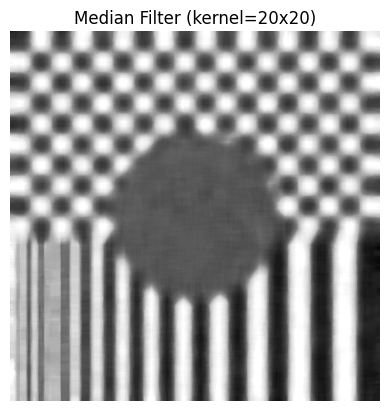

Size: 40


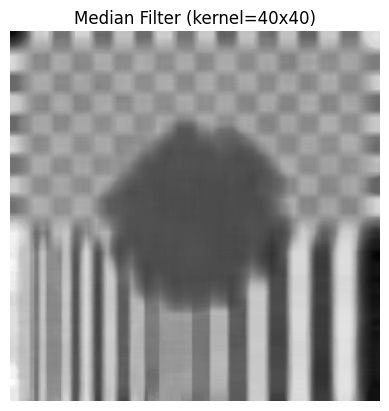

In [44]:
sizes = [5, 10, 20, 40]

for size in sizes:
    print(f"Size: {size}")
    median_filter(gaus_img, size)

Noise is reduced and the dark areas are darker than the mean filtering. There are still some pretty sharp lines in the vertical, but not really in the checkerboard pattern.

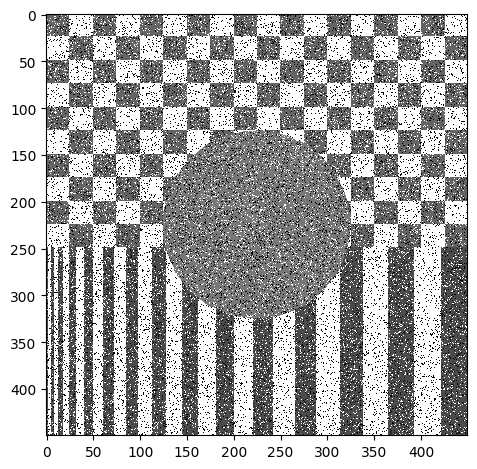

In [45]:
salt_img = io.imread("data/SaltPepper.png")
salt_img = color.rgb2gray(salt_img)
io.imshow(salt_img)

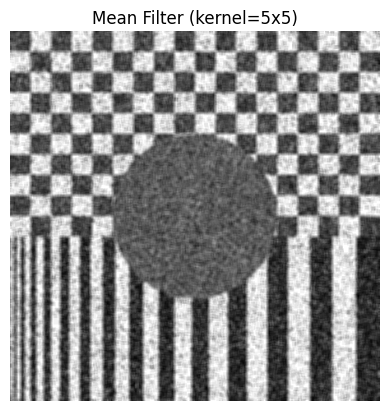

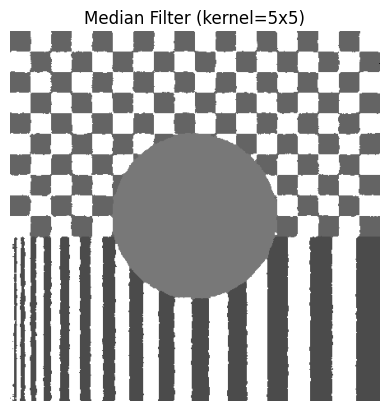

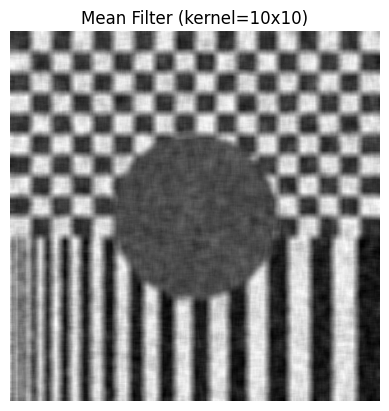

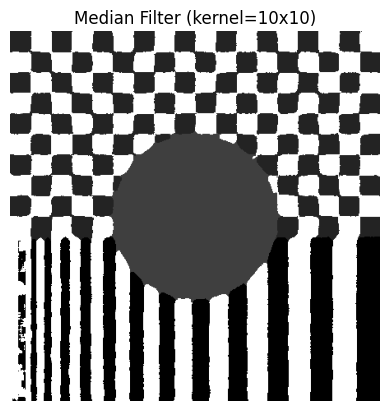

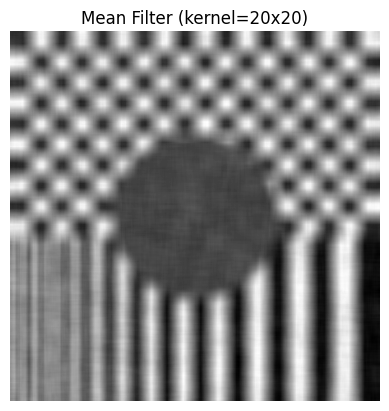

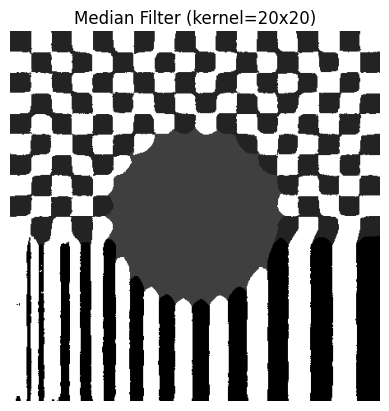

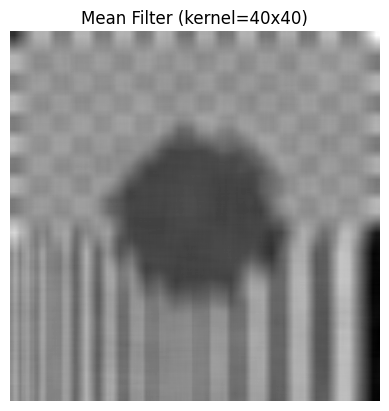

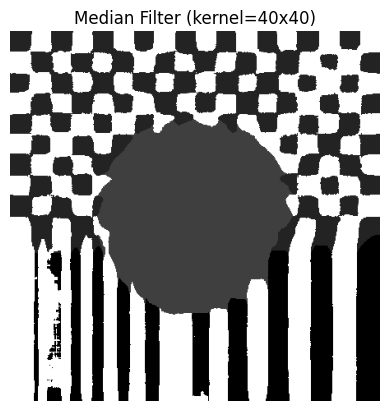

In [46]:
sizes = [5, 10, 20, 40]

for size in sizes:
    mean_filter(salt_img, size)
    median_filter(salt_img, size)

The median filter 5x5 and 10x10 look pretty good and remove the noise without changing the image too much. The mean just blurs the image and isn't very useful.

# Exercise 6

In [47]:
def gaussian_filter(img, sigma):
    gauss_img = gaussian(img, sigma)
    plt.figure()
    plt.imshow(gauss_img, cmap='gray')
    plt.title(f'Gaussian Filter (sigma={sigma})')
    plt.axis('off')
    plt.show()

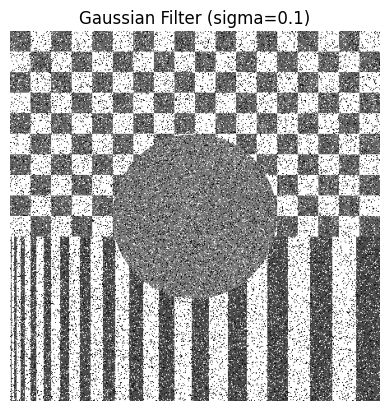

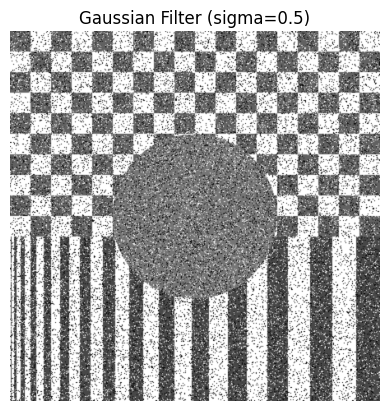

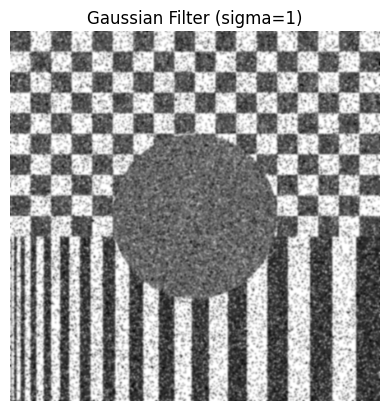

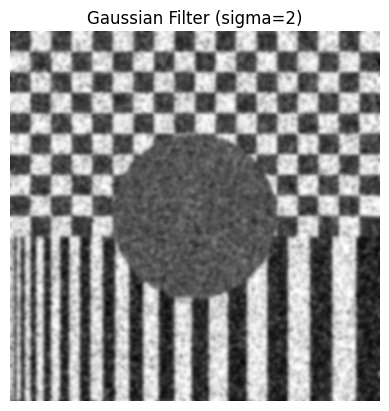

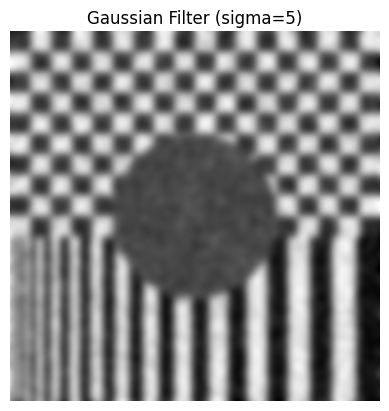

In [48]:
sigmas = [0.1, 0.5, 1, 2, 5]

for sigma in sigmas:
    gaussian_filter(salt_img, sigma)

Also seems to be blurring the image and removing some of the noise but also the transitions are not as smooth as they should be.

# Exercise 7

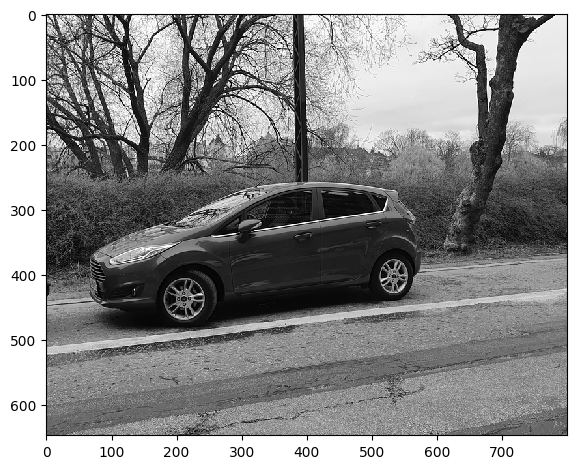

In [49]:
car_img = io.imread("data/car.png")
car_img = color.rgb2gray(car_img)
io.imshow(car_img)

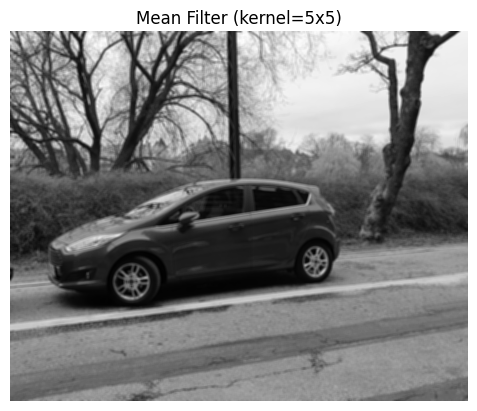

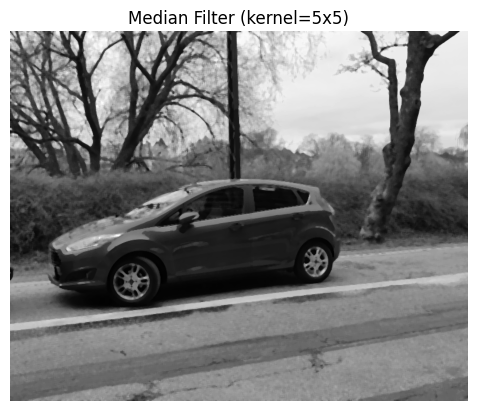

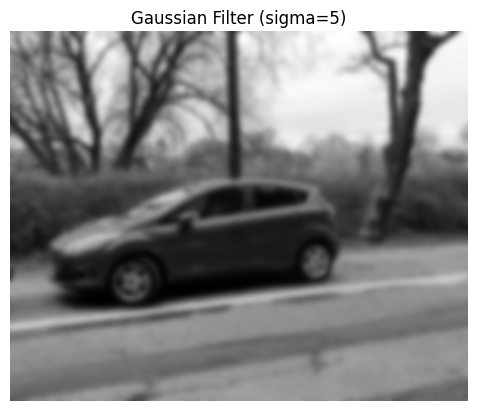

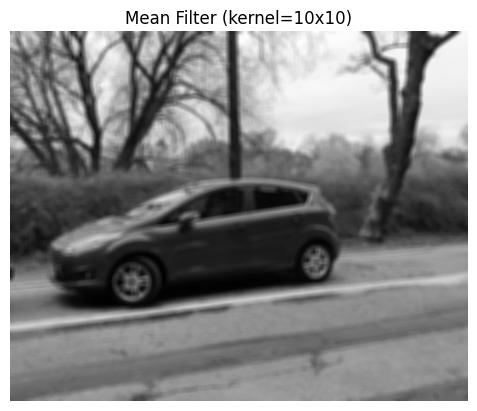

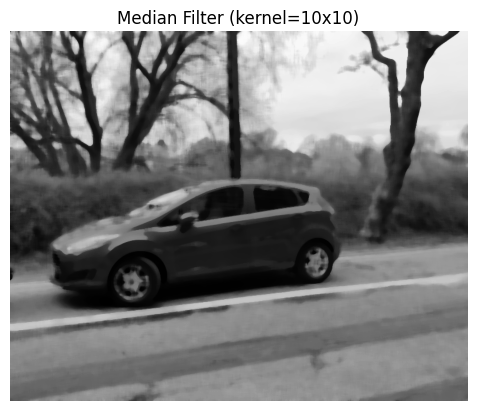

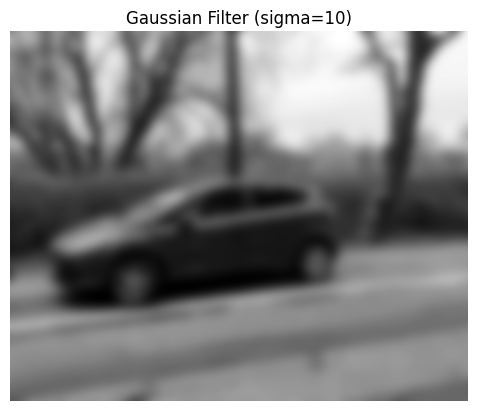

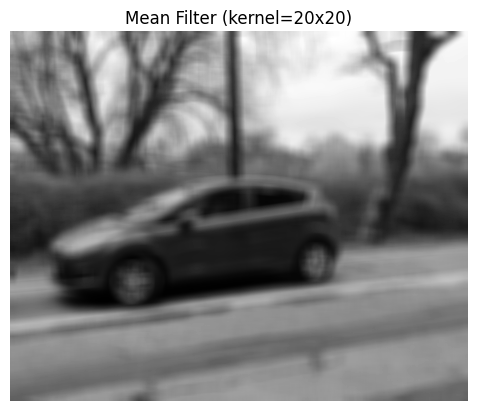

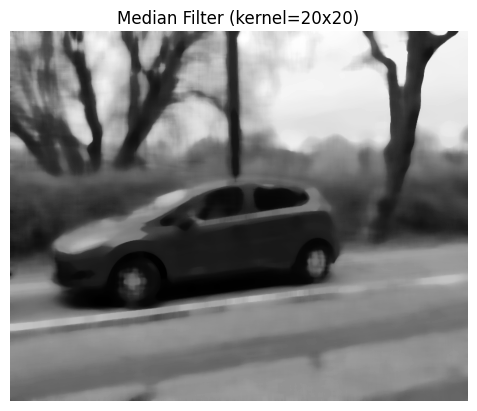

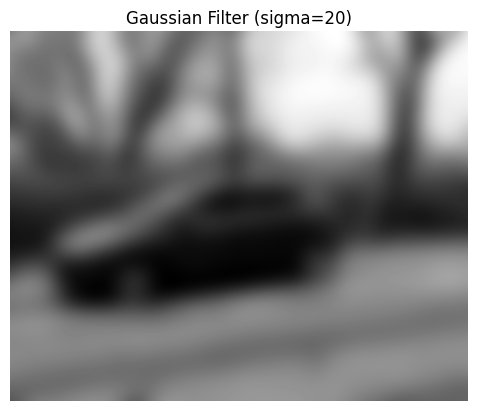

In [50]:
sizes = [5, 10, 20]

for size in sizes:
    mean_filter(car_img, size)
    median_filter(car_img, size)
    gaussian_filter(car_img, size)


The gaussian blur is more smooth than the mean blur. The median filter has sharper edges so it is easier to see the details in the image.

# Exercise 8 and 9

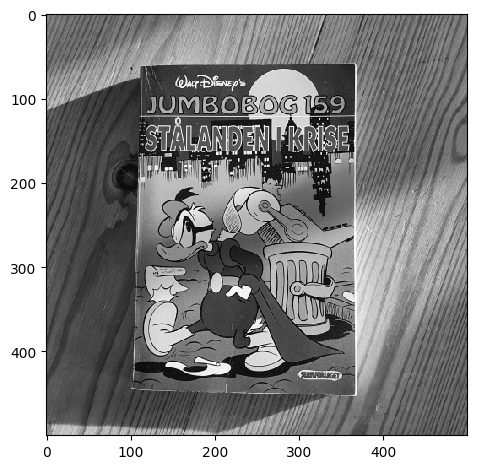

In [51]:
donald_img = io.imread("data/donald_1.png")
donald_img = color.rgb2gray(donald_img)
io.imshow(donald_img)

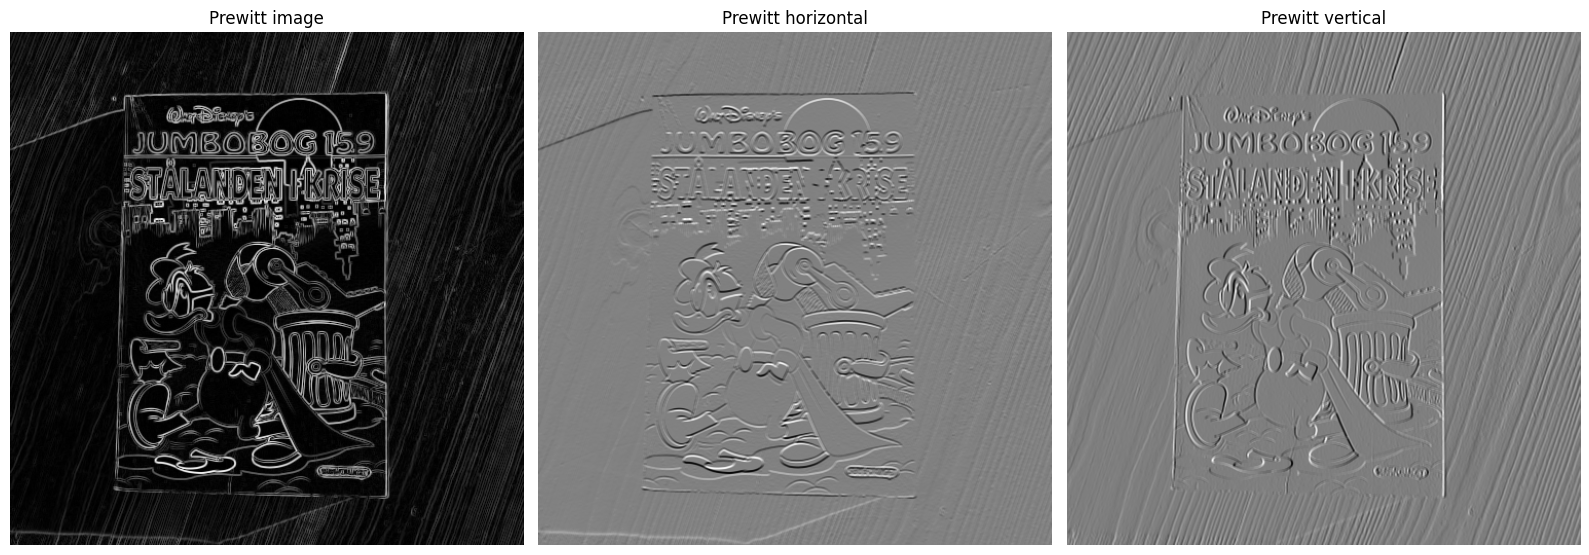

In [52]:
ph_img = prewitt_h(donald_img)
pv_img = prewitt_v(donald_img)
p_img = prewitt(donald_img)

# Show the results
fig, ax = plt.subplots(ncols=3, figsize=(16, 6))
ax[0].imshow(p_img, cmap='gray')
ax[0].set_title('Prewitt image')
ax[0].axis('off')
ax[1].imshow(ph_img, cmap='gray')
ax[1].set_title('Prewitt horizontal')
ax[1].axis('off')
ax[2].imshow(pv_img, cmap='gray')
ax[2].set_title('Prewitt vertical')
ax[2].axis('off')
plt.tight_layout()
plt.show()

In [53]:
ph_img

array([[ 8.96679739e-03,  1.77450980e-02,  1.76508497e-02, ...,
         3.36104575e-03,  5.13712418e-03,  1.59692810e-02],
       [ 2.47473203e-02,  3.41830065e-02,  2.46606536e-02, ...,
        -8.22013072e-03,  2.61437909e-06,  6.16653595e-03],
       [ 3.24145098e-02,  2.65283660e-02,  9.43307190e-03, ...,
        -1.55027451e-02, -3.25921569e-03, -1.52967320e-02],
       ...,
       [ 1.98832680e-02, -2.30730719e-02, -2.92369935e-02, ...,
        -1.82139869e-02, -3.63311111e-02, -5.07994771e-02],
       [ 1.67921569e-03, -1.81247059e-02, -1.86852288e-02, ...,
        -2.83861438e-02, -8.31202614e-03,  8.02405229e-03],
       [ 6.91790850e-03,  6.16130719e-03,  3.26418301e-03, ...,
        -1.59564706e-02,  6.17647059e-03,  2.32641830e-02]])

In the prewitt_h and prewitt_v images the edges are dark and the background is light

In the prewitt image the edges are light and the background is dark

# Exercise 10

(512, 512)


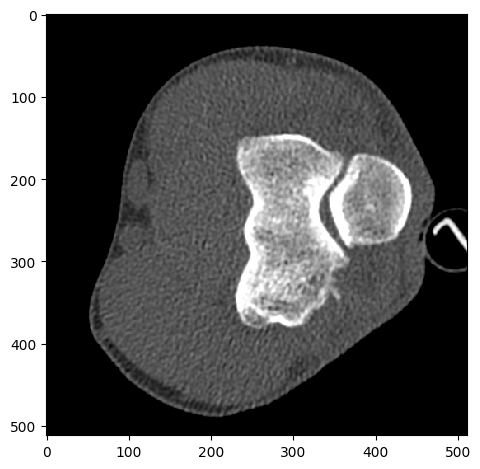

In [54]:
elbow_img = io.imread("data/ElbowCTSlice.png", as_gray=True)
print(elbow_img.shape)  
io.imshow(elbow_img)

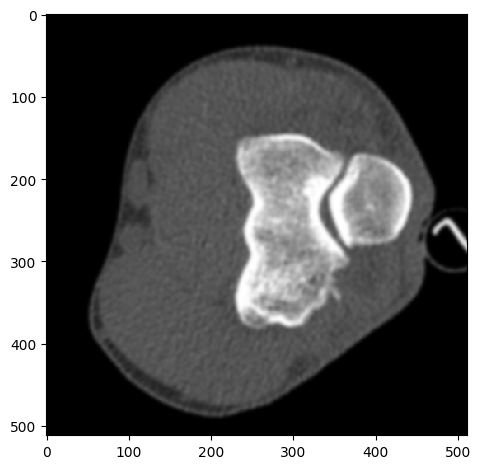

In [55]:
# Gaussian filter
sigma = 2
gauss_img = gaussian(elbow_img, sigma)
io.imshow(gauss_img)

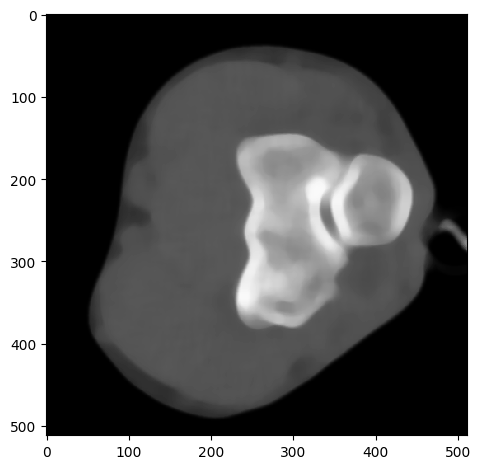

In [56]:
# Median filter

size = 20
footprint = np.ones([size, size])
med_img = median(gauss_img, footprint)
io.imshow(med_img)

/home/aw/Dropbox/education/uni/7_semester/imageAnal/DTUImageAnalysis/.venv/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


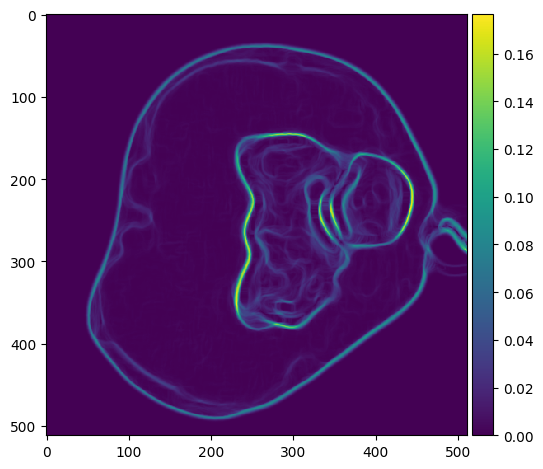

In [57]:
prewitt_img = prewitt(med_img)
io.imshow(prewitt_img)

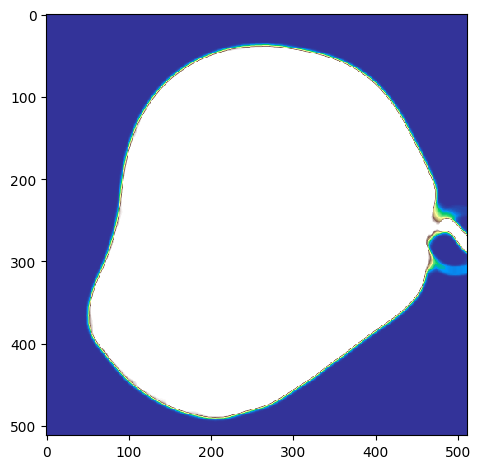

In [58]:
min_val = prewitt_img.min()
max_val = prewitt_img.max()
io.imshow(med_img, vmin=min_val, vmax=max_val, cmap="terrain")

In [59]:
# Compute otsu threshold
otsu = threshold_otsu(prewitt_img)
print(f"Otsu threshold: {otsu}")

Otsu threshold: 0.03482896352897245


In [60]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    img_in[img_in < thres] = 0
    img_in[img_in >= thres] = 1
    return img_in

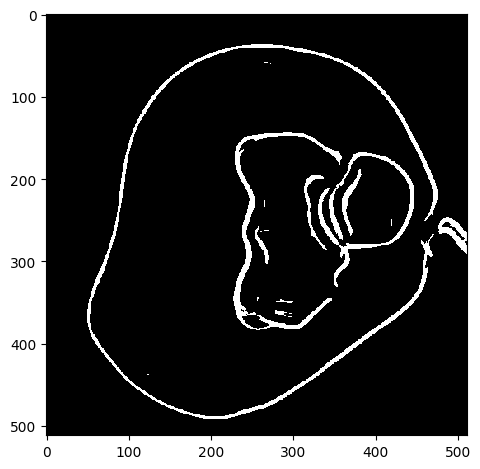

In [61]:
# Create binary image using otsu thresholding
res_img = threshold_image(prewitt_img, otsu)
io.imshow(res_img)

I think the median gives thinner and clearer lines than the gaussian filter

Gaussian first and then median also gives good results

# Exercise 11
Done

# Exercise 12
FPS goes from 20 before to 1 after median. This is because it is computationally more expensive to compute the median filter.